### Now that we've verified our functions using model_verification_fns.ipynb, let's actually implement the LayerNorm TopK

In [1]:
import torch
from transformers import GPT2Config, GPT2Tokenizer, GPT2LMHeadModel
from matplotlib import pyplot as plt
from utils.datasets import get_top_n_tiny_shakespeare
from models import TopKGPT2Model
from utils.model import plot_intermediate_model_outputs

In [2]:
config = GPT2Config()
topk_model = TopKGPT2Model(config).eval()
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-medium")

topk_model_with_gpt2_head = GPT2LMHeadModel(config)

topk_model_with_gpt2_head.transformer = topk_model

topk_model_with_gpt2_head = topk_model_with_gpt2_head.eval()

In [3]:
input_ids = torch.tensor([[12100, 242, 508, 318, 13, 198]])

out = topk_model(input_ids)

### Plotting & Heatmapping LayerNorm

In [4]:
h0_inter = topk_model.h[0].intermediate_outputs

In [5]:
h0_inter.keys()

dict_keys(['initial_residual', 'initial_hidden_states', 'post_ln1_residual', 'post_ln1_hidden_states', 'attn_projection_output', 'post_attn_residual_hidden_states', 'post_cross_attn_residual', 'post_cross_attn_hidden_states', 'post_ln2_residual', 'post_ln2_hidden_states', 'post_feed_fwd_hidden_states', 'post_feed_fwd_residual_hidden_states'])

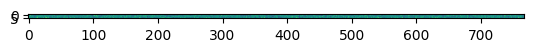

In [6]:
plt.imshow(topk_model.h[0].intermediate_outputs['post_ln1_residual'][0])

In [7]:
longest_shakespeare = get_top_n_tiny_shakespeare(1, mode="longest")[0]['Text']
longest_shakespeare

"Our king, being ready to leap out of\nhimself for joy of his found daughter, as if that\nOur king, being ready to leap out of\njoy were now become a loss, cries 'O, thy mother,\nthy mother!' then asks Bohemia forgiveness; then\nembraces his son-in-law; then again worries he his\ndaughter with clipping her; now he thanks the old\nshepherd, which stands by like a weather-bitten\nconduit of many kings' reigns. I never heard of such\nanother encounter, which lames report to follow it\nand undoes description to do it.\n\nSecond Gentleman:\nWhat, pray you, became of Antigonus, that carried\nhence the child?\n\nThird Gentleman:\nLike an old tale still, which will have matter to\nrehearse, though credit be asleep and not an ear\nopen. He was torn to pieces with a bear: this\navouches the shepherd's son; who has not only his\ninnocence, which seems much, to justify him, but a\nhandkerchief and rings of his that Paulina knows.\n\nFirst Gentleman:\nWhat became of his bark and his followers?\n\nT

In [8]:
input_ids = tokenizer.encode(longest_shakespeare, return_tensors="pt")
outputs = topk_model(input_ids)

In [9]:
h0_inter = topk_model.h[0].intermediate_outputs

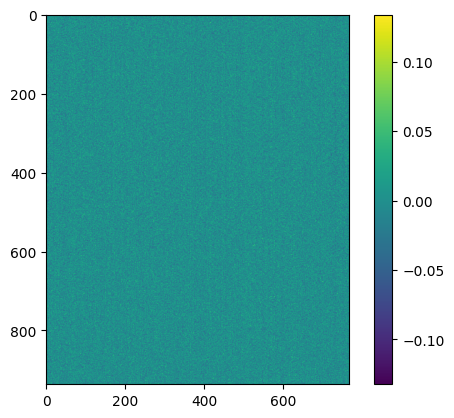

In [10]:
plt.imshow(topk_model.h[0].intermediate_outputs['post_ln1_residual'][0])
plt.colorbar()

In [11]:
h0_inter['attn_projection_output'].shape

torch.Size([1, 937, 768])

In [12]:
res = topk_model_with_gpt2_head(input_ids, output_attentions=True)

In [13]:
# res['attentions']

In [14]:
res['attentions'][0].shape

torch.Size([1, 12, 937, 937])

In [15]:
# res['attentions'][0]

## Second input prompt - shortest

So model is dependent on input length, even though we're plotting the supposedly independent TopKModel variable

## Plot biggest prompts from TinyShakespeare

In [16]:
get_top_n_tiny_shakespeare(3, mode="longest")[1]['Text']

"I am sorry,\nMost sorry, you have broken from his liking\nWhere you were tied in duty, and as sorry\nI am sorry,\nMost sorry, you have broken from his liking\nYour choice is not so rich in worth as beauty,\nThat you might well enjoy her.\n\nFLORIZEL:\nDear, look up:\nThough Fortune, visible an enemy,\nShould chase us with my father, power no jot\nHath she to change our loves. Beseech you, sir,\nRemember since you owed no more to time\nThan I do now: with thought of such affections,\nStep forth mine advocate; at your request\nMy father will grant precious things as trifles.\n\nLEONTES:\nWould he do so, I'ld beg your precious mistress,\nWhich he counts but a trifle.\n\nPAULINA:\nSir, my liege,\nYour eye hath too much youth in't: not a month\n'Fore your queen died, she was more worth such gazes\nThan what you look on now.\n\nLEONTES:\nI thought of her,\nEven in these looks I made.\nBut your petition\nIs yet unanswer'd. I will to your father:\nYour honour not o'erthrown by your desires,\n

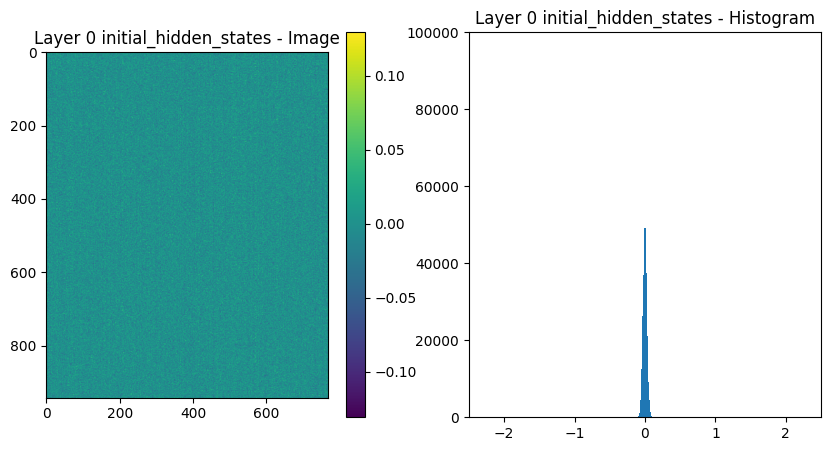

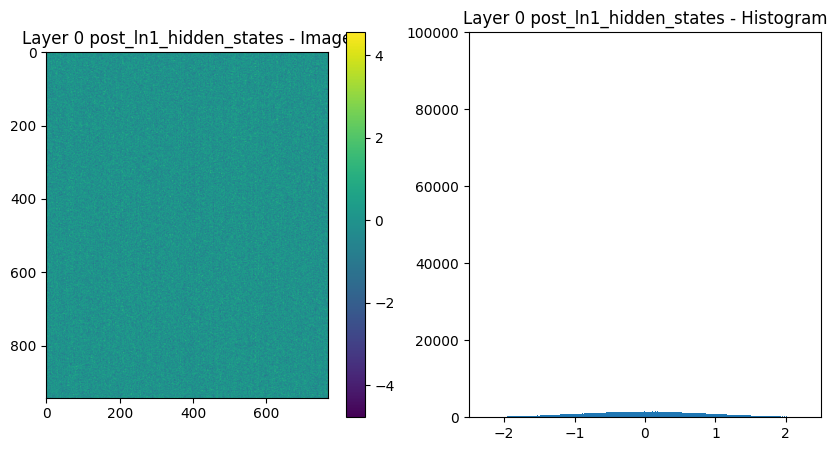

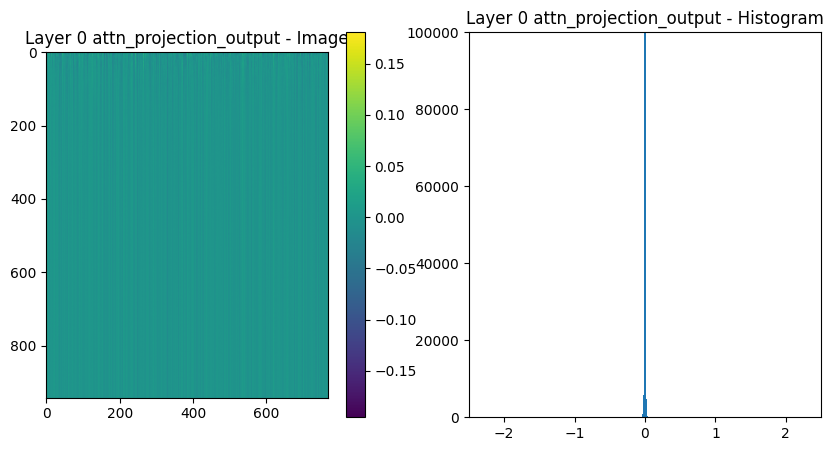

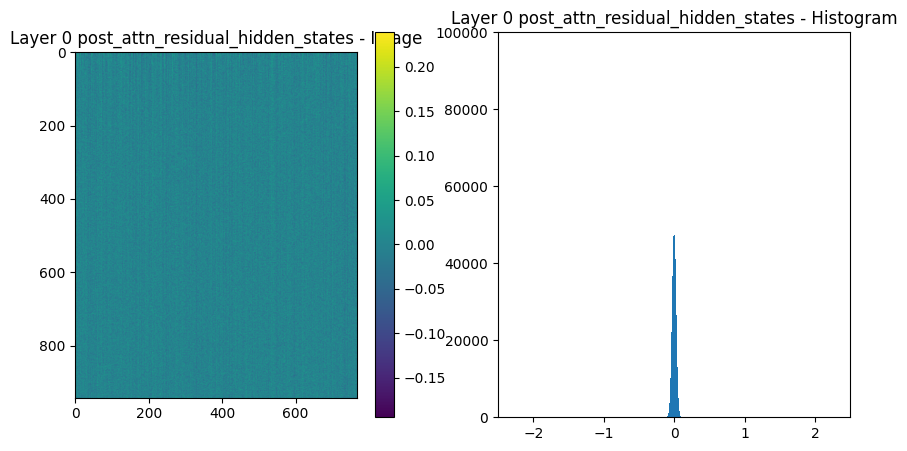

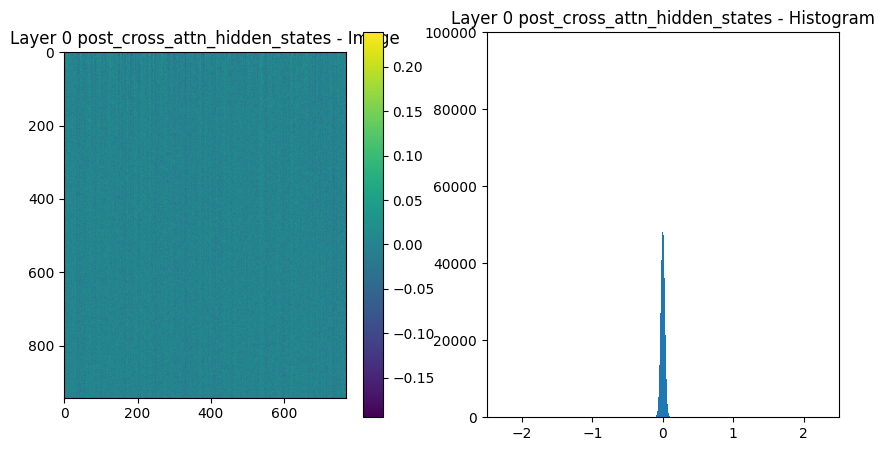

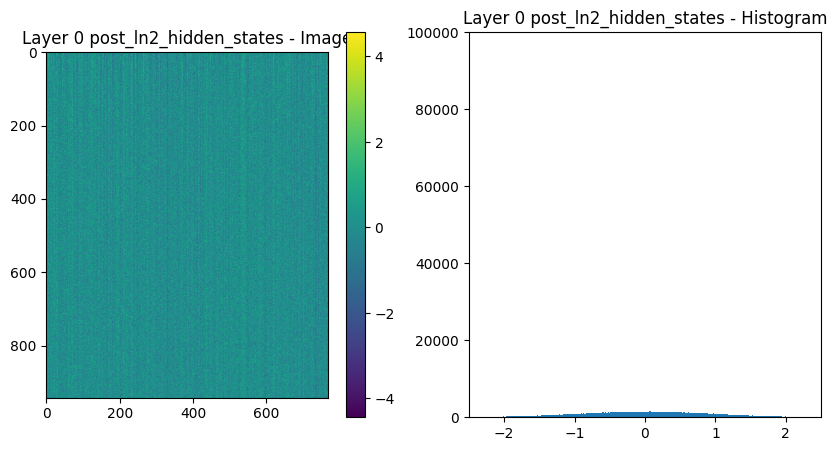

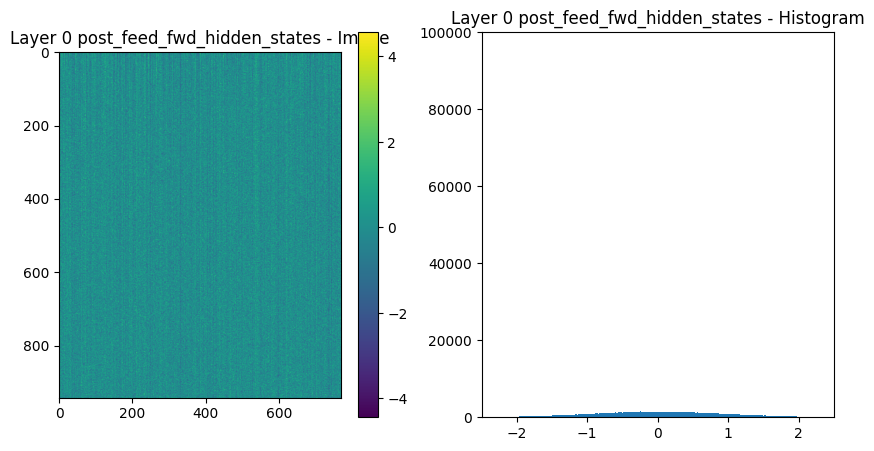

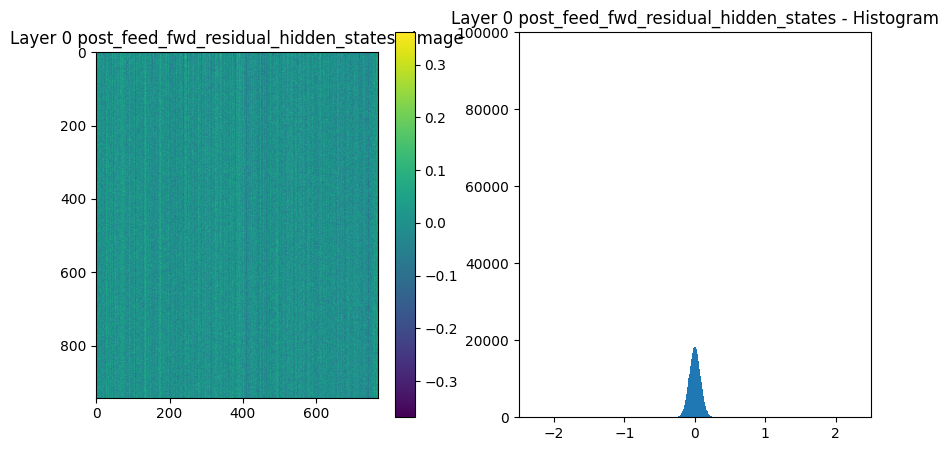

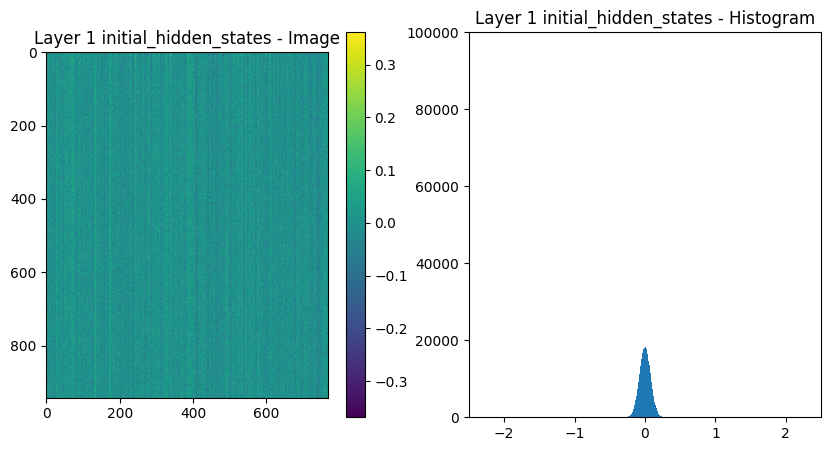

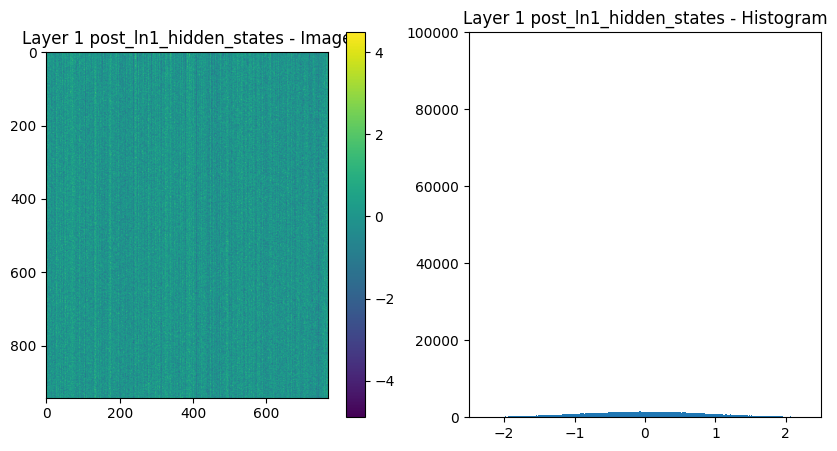

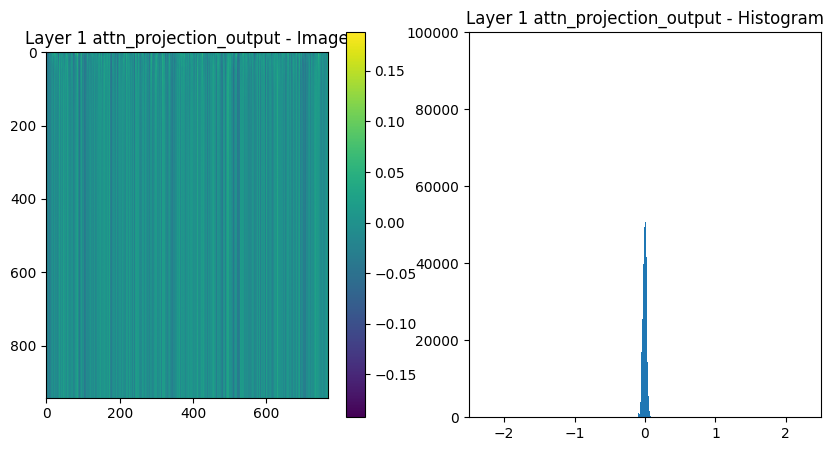

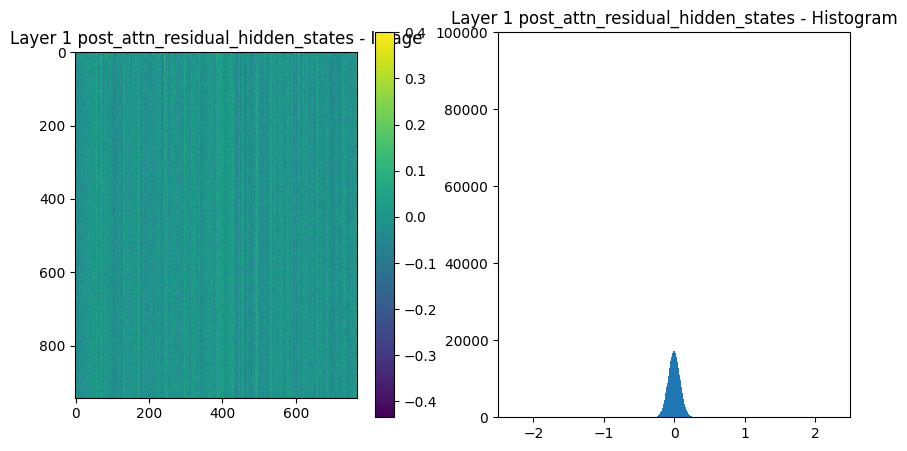

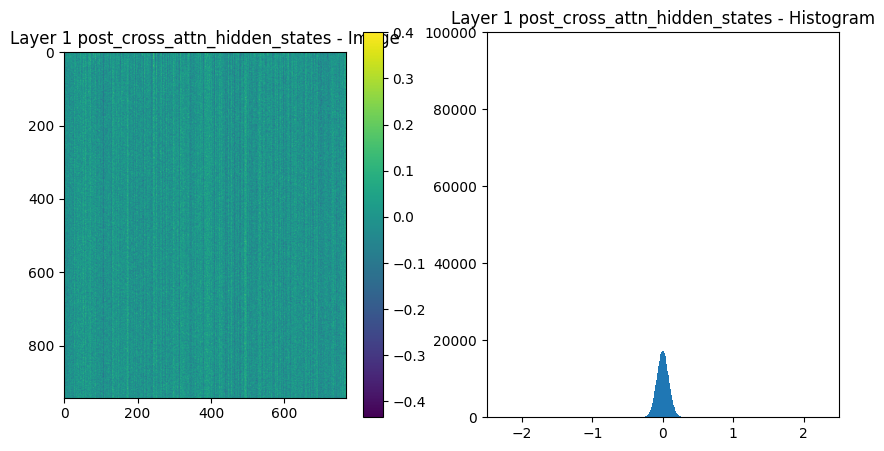

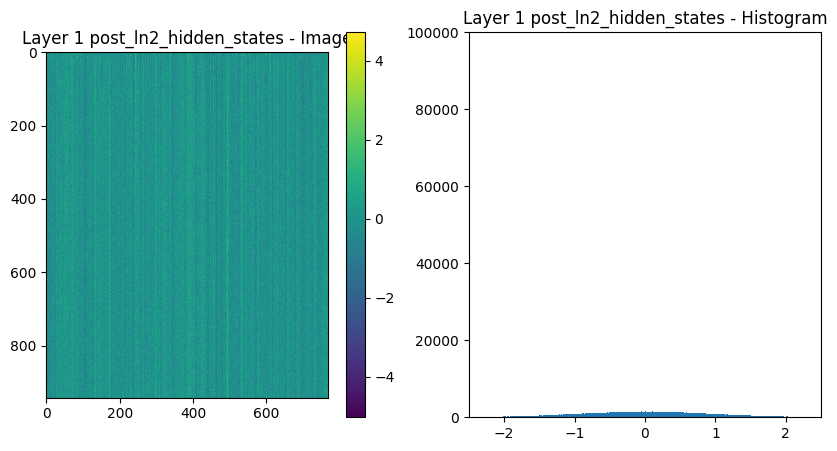

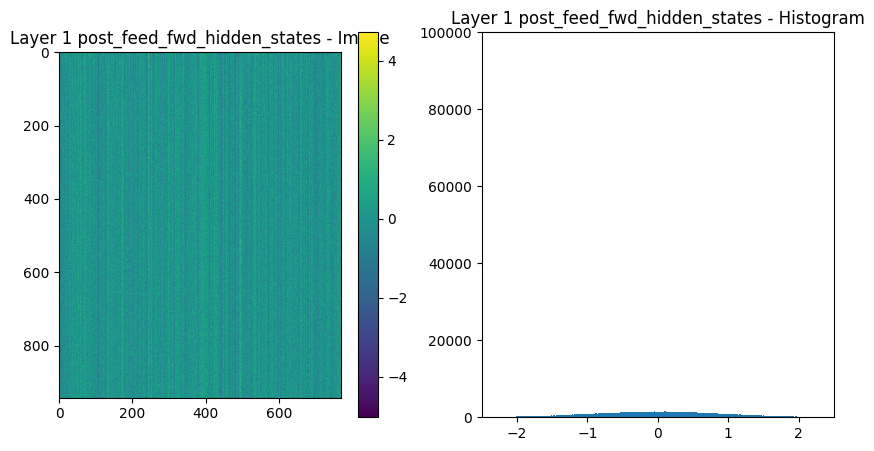

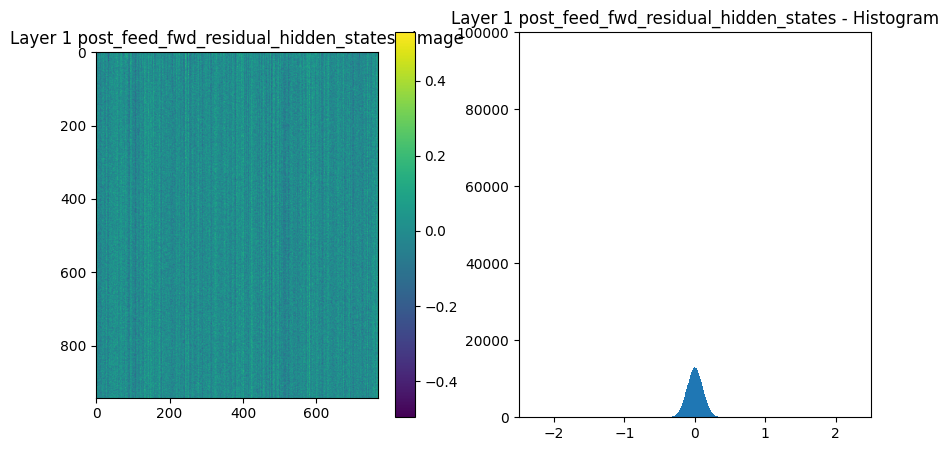

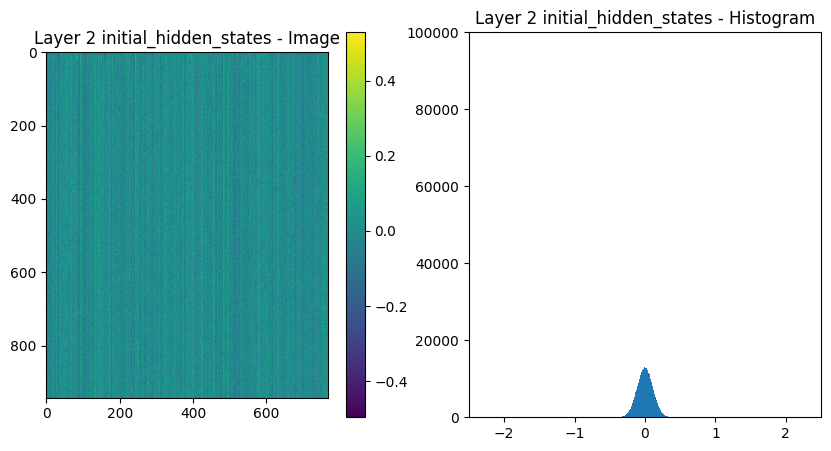

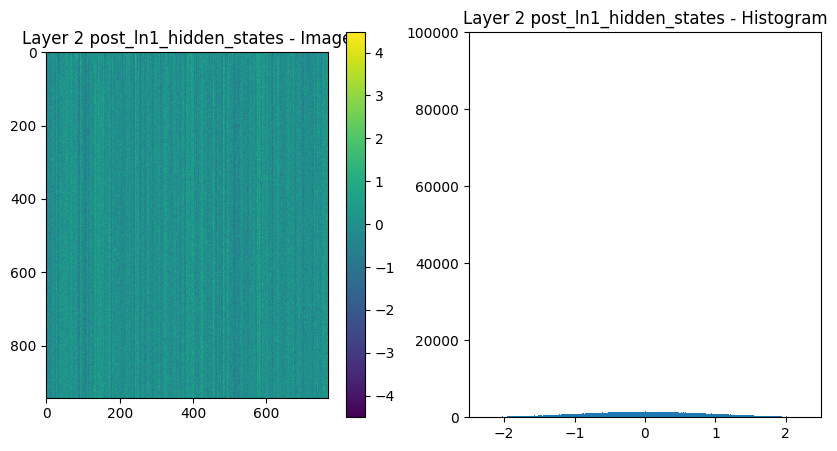

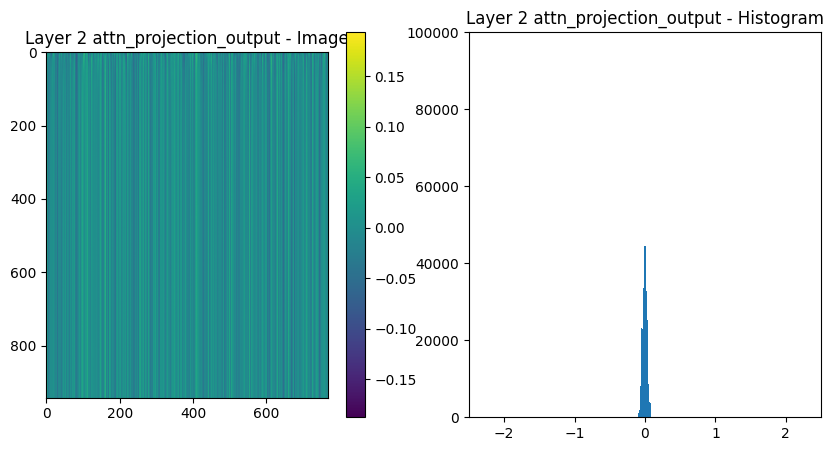

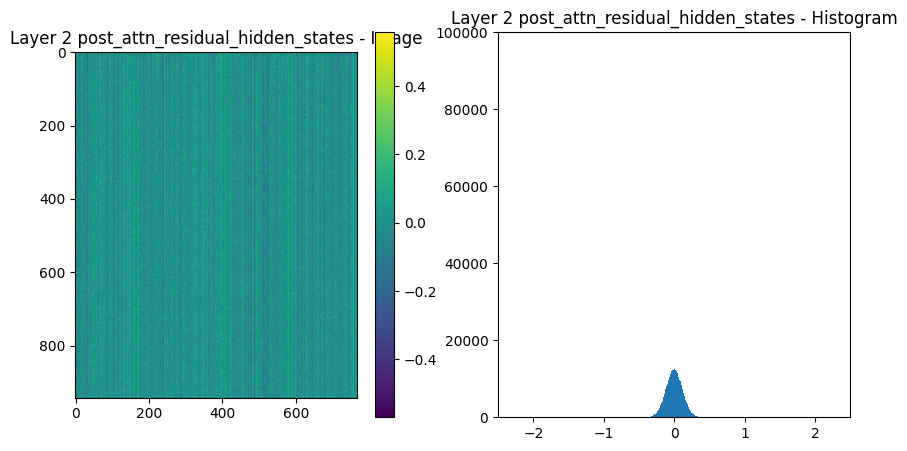

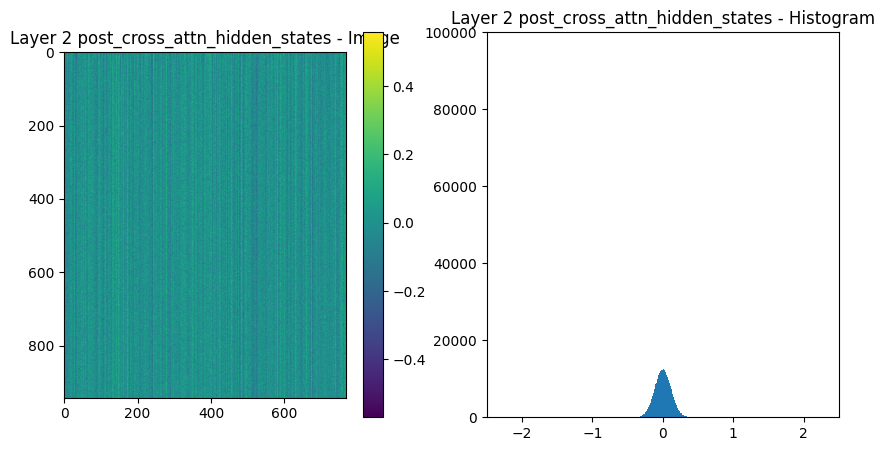

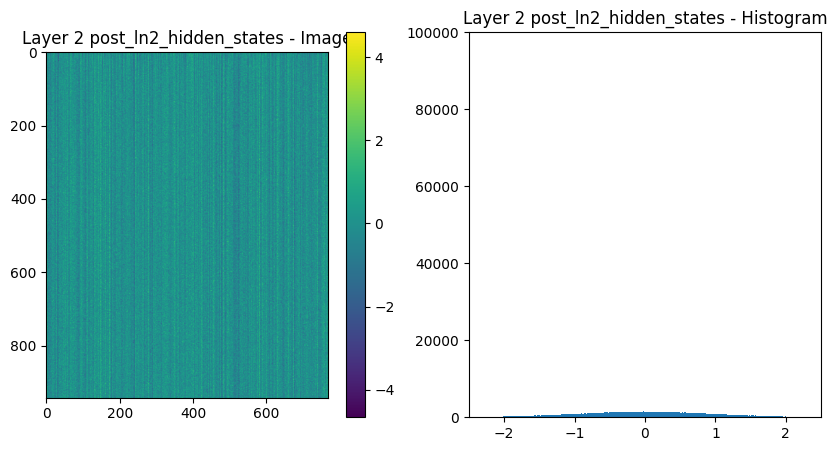

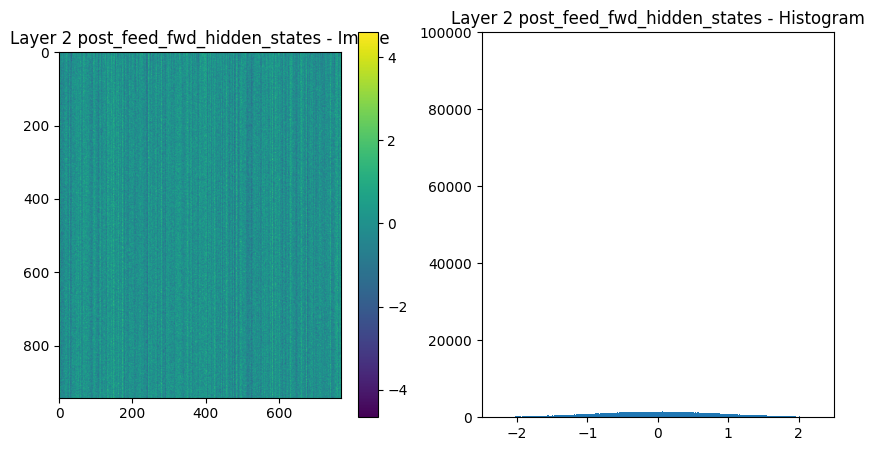

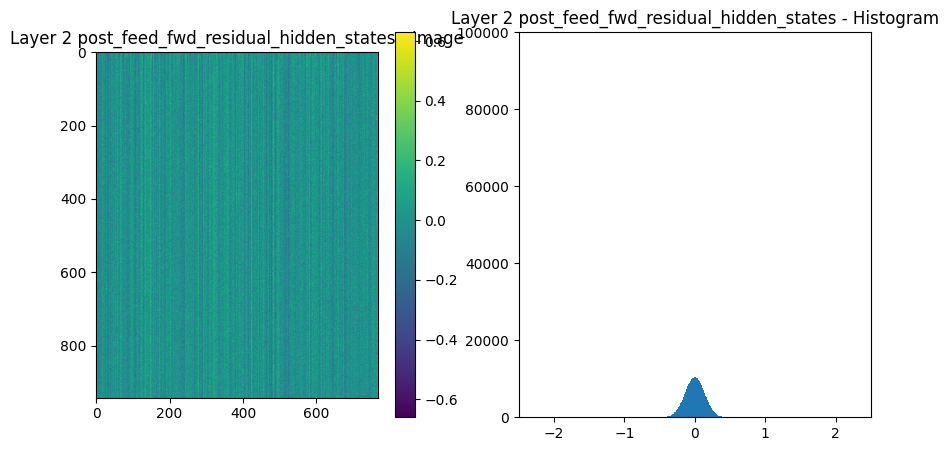

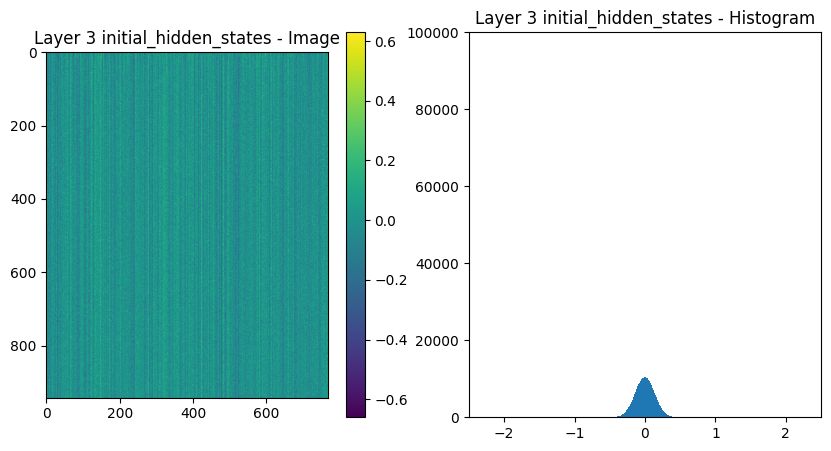

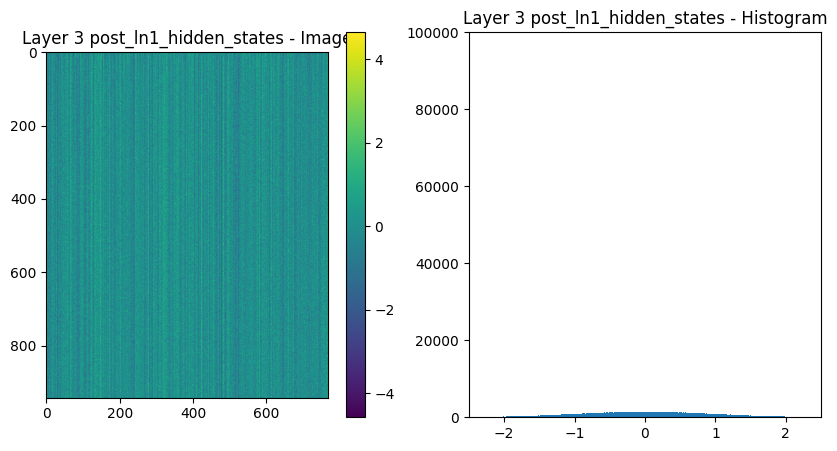

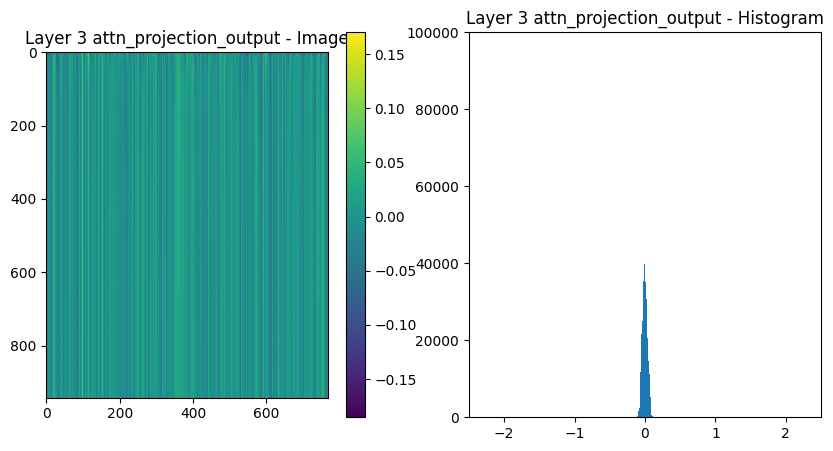

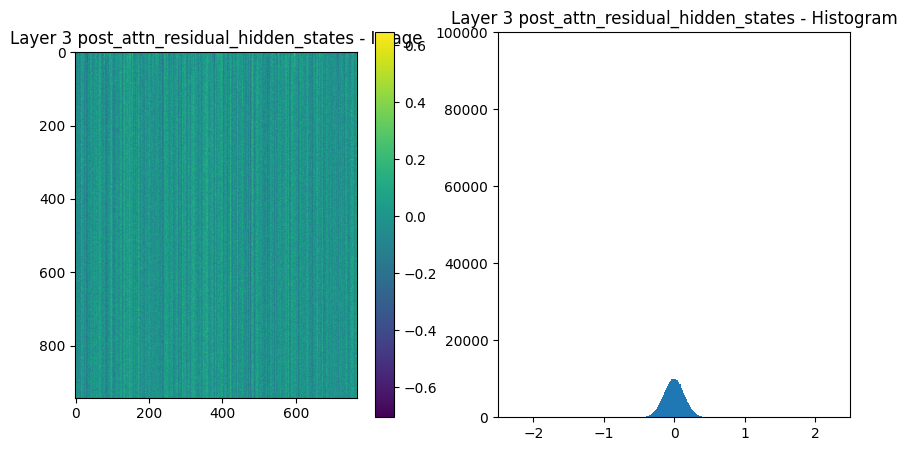

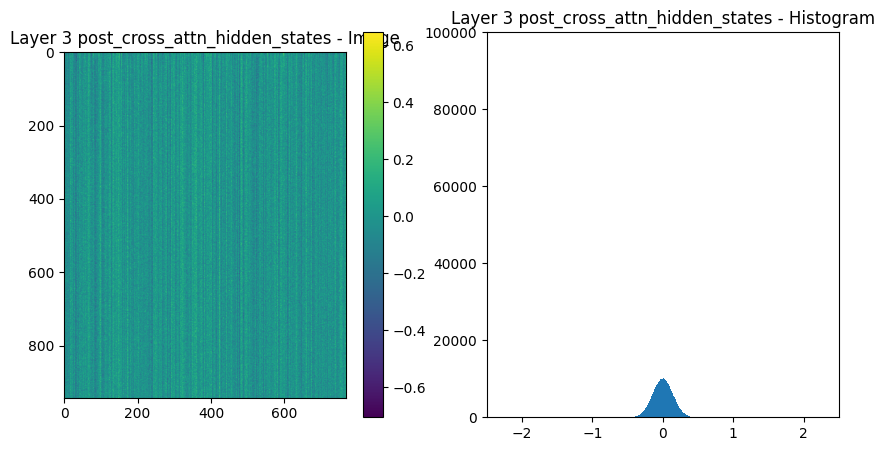

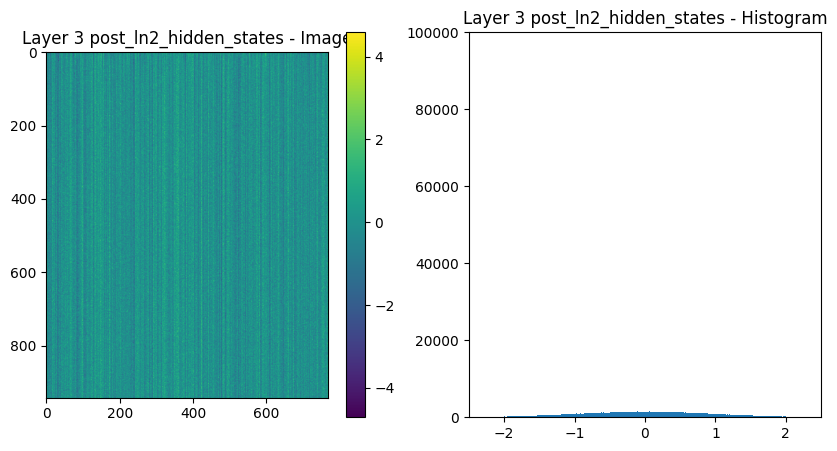

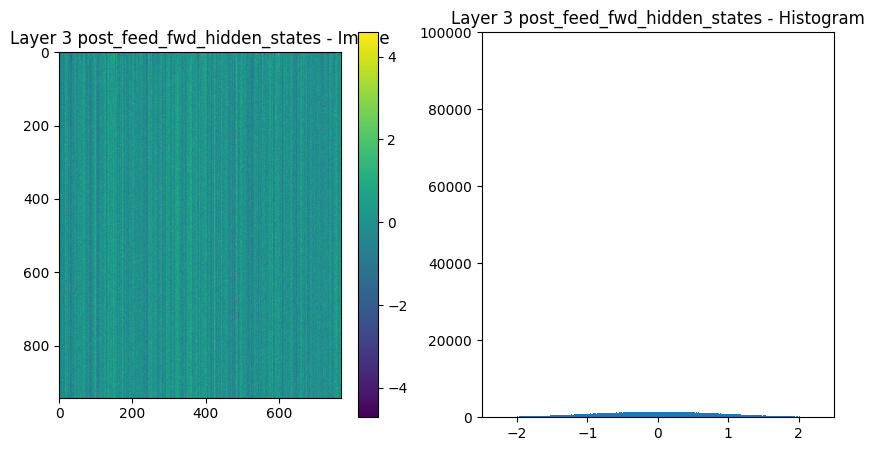

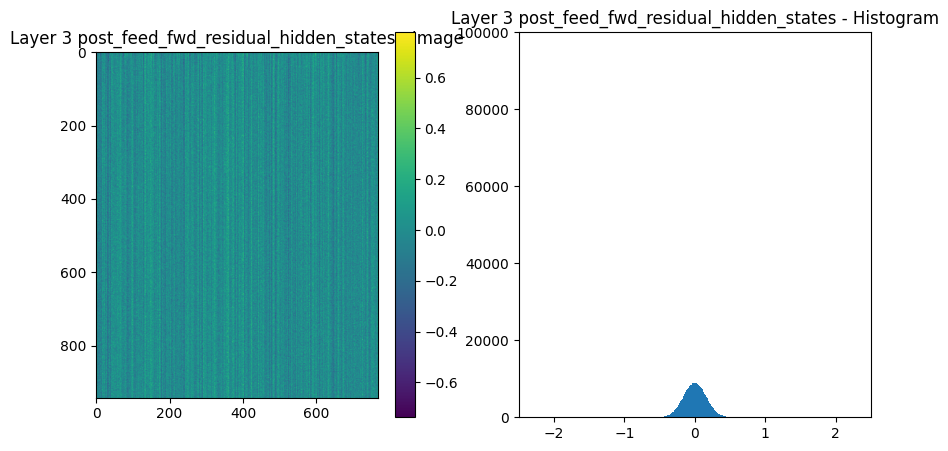

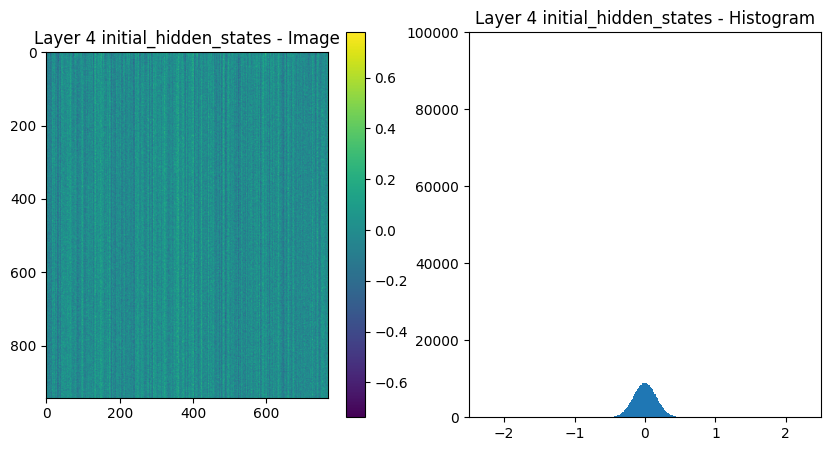

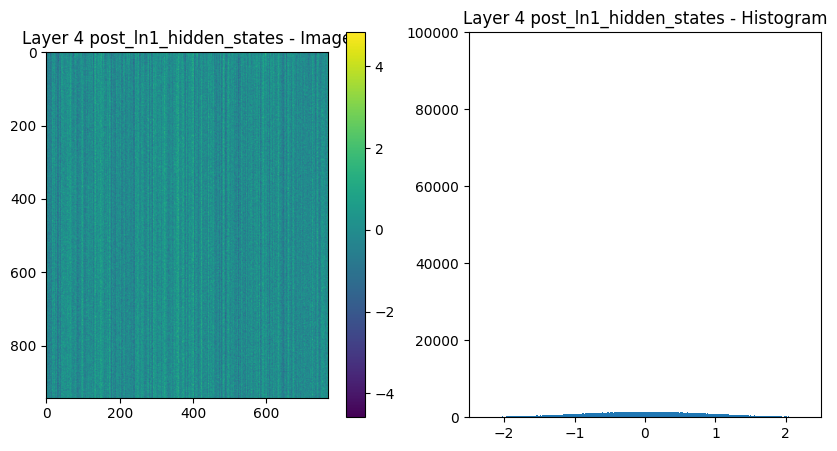

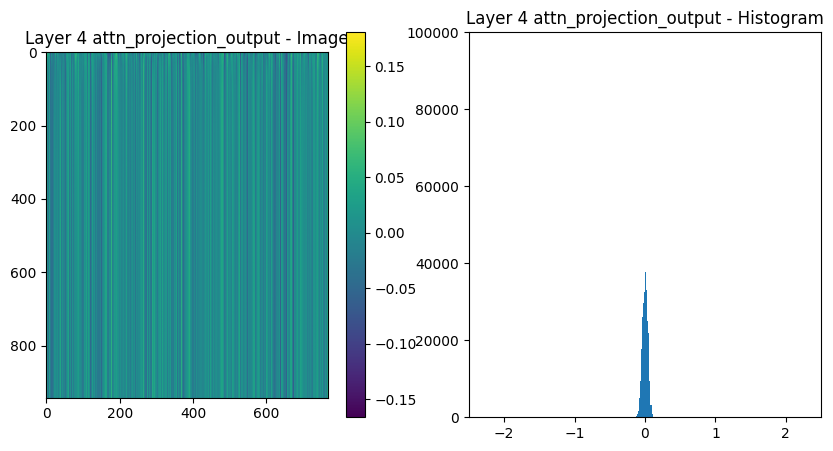

In [18]:
second_longest = get_top_n_tiny_shakespeare(3, mode="longest")[1]['Text']
input_ids = tokenizer.encode(second_longest, return_tensors="pt")
outputs = topk_model(input_ids)

# Nr. bins drastically changes the look of the plot
plot_intermediate_model_outputs(topk_model, xlim=[-2.5,2.5], ylim=[0,100000], bins=1000)

## Plot 2nd biggest prompts from TinyShakespeare

In [ ]:
second_longest = get_top_n_tiny_shakespeare(3, mode="longest")[2]['Text']
input_ids = tokenizer.encode(second_longest, return_tensors="pt")
outputs = topk_model(input_ids)

plot_intermediate_model_outputs(topk_model, xlim=[-2.5,2.5], ylim=[0,100000], bins=1000)